# ✈ Flight Price Prediction using Regression Models

This notebook demonstrates the process of predicting flight prices using machine learning.  

### Steps Covered:

1. **Import Libraries**  
   We import libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), preprocessing (`LabelEncoder`, `OneHotEncoder`, `StandardScaler`), regression models (`LinearRegression`, `Ridge`, `ElasticNet`, `DecisionTreeRegressor`, `KNeighborsRegressor`, `SVR`, `RandomForestRegressor`, `GradientBoostingRegressor`, `ExtraTreesRegressor`, `AdaBoostRegressor`, `XGBRegressor`, `CatBoostRegressor`), and model evaluation metrics (`mean_absolute_error`, `mean_squared_error`, `r2_score`).  

2. **Load Dataset**  
   Load the cleaned flight dataset `Clean_Dataset.csv` containing flight details and prices. Explore the data using `.head()`, `.info()`, and `.describe()`.  

3. **Data Preprocessing**  
   Handle categorical and numerical features using `OneHotEncoder` and `StandardScaler` inside a `ColumnTransformer`. Encode target and categorical variables as necessary.  

4. **Train-Test Split**  
   Split data into training and testing sets to evaluate model performance.  

5. **Model Building**  
   Train multiple regression models including linear, tree-based, ensemble, boosting, and SVM regressors.  

6. **Hyperparameter Tuning**  
   Use `RandomizedSearchCV` to optimize model hyperparameters efficiently.  

7. **Model Evaluation**  
   Evaluate models using metrics:  
   - MAE (Mean Absolute Error)  
   - MSE (Mean Squared Error)  
   - RMSE (Root Mean Squared Error)  
   - R² (Coefficient of Determination)  

This notebook provides a full pipeline from data loading to model evaluation for predicting flight prices.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.metrics import mean_absolute_error , r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor ,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
from scipy.stats import uniform, randint

df=pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")


## 🔍 Exploratory Data Analysis (EDA)

Before building models, it is important to understand the dataset and its underlying patterns.  
EDA helps us to:

1. **Understand data structure** – check data types, missing values, and summary statistics.
2. **Visualize distributions** – see how numerical and categorical variables are distributed.
3. **Detect patterns and relationships** – find correlations between features and target (`Price`).
4. **Identify outliers and anomalies** – spot unusual values that may affect model performance.

### Key EDA Steps:

1. **Dataset Overview**
   - `df.head()` – view first few rows  
   - `df.info()` – check column types and missing values  
   - `df.describe()` – see summary statistics for numerical columns  

2. **Missing Values**
   - Identify columns with missing data  
   - Decide whether to drop or impute missing values  

3. **Categorical Feature Analysis**
   - Count unique categories in columns like `Airline`, `Source`, `Destination`, etc.  
   - Plot countplots to visualize distribution of categories  

4. **Numerical Feature Analysis**
   - Check distribution of features like `Duration`, `Days_left`, `Price`  
   - Plot histograms and boxplots to detect outliers  

5. **Correlation Analysis**
   - Use correlation matrix and heatmap to understand relationships between numerical features and target  
   - Identify highly correlated features that may affect the model  

6. **Target Variable Analysis**
   - Explore `Price` distribution  
   - Check skewness and consider transformations if necessary


In [3]:
# print the frist 10 rows 
df.head(5)

# print the last 10 rows 
#df.tail(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.sample(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
173294,173294,Vistara,UK-874,Hyderabad,Morning,one,Evening,Kolkata,Economy,8.33,24,9079
289034,289034,Vistara,UK-836,Chennai,Morning,zero,Afternoon,Delhi,Business,2.75,27,27792
289026,289026,Vistara,UK-822,Chennai,Morning,one,Night,Delhi,Business,12.17,26,60160
145191,145191,Indigo,6E-207,Kolkata,Morning,one,Evening,Hyderabad,Economy,7.83,25,6489
71474,71474,Vistara,UK-653,Mumbai,Early_Morning,one,Evening,Hyderabad,Economy,12.00,10,14868


In [5]:
# drope the Unnamed: 0 	 column 
df.drop("Unnamed: 0",axis=1,inplace =True)

In [6]:
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
44496,Vistara,UK-851,Mumbai,Early_Morning,one,Afternoon,Delhi,Economy,7.17,10,12138
240048,Air_India,AI-867,Mumbai,Night,one,Morning,Hyderabad,Business,14.42,30,45693
164723,Indigo,6E-793,Hyderabad,Evening,one,Late_Night,Mumbai,Economy,8.58,43,5127
78048,Vistara,UK-944,Mumbai,Afternoon,one,Night,Chennai,Economy,8.08,7,11129
288606,Vistara,UK-822,Chennai,Morning,one,Evening,Delhi,Business,7.17,19,57920


In [7]:
# print the shape of data

df.shape

(300153, 11)

In [8]:
# see th duplicated data 
df.duplicated().sum()

0

In [9]:
# see the number of the nan value 
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
# print the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
# describe numiercal columns in "df" 
df.describe()


# describe all the columns in "df" 
#df.describe(include = "all")

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [12]:
# print the column of the data 
df.columns.tolist()

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


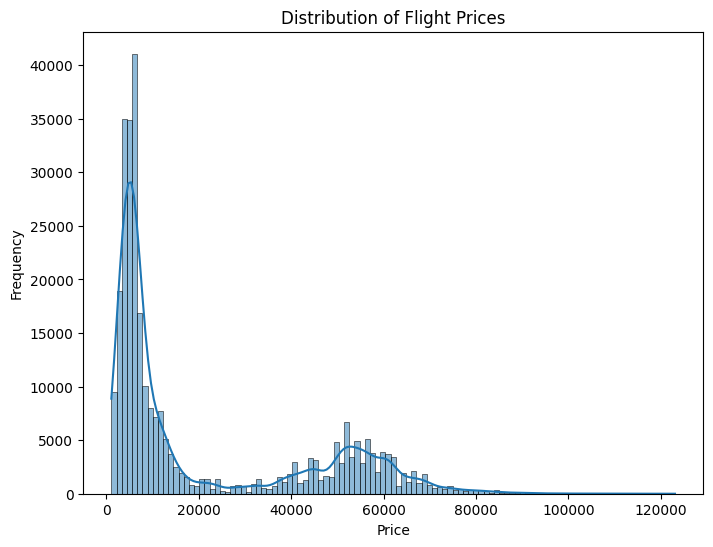

In [13]:
# Plotting the distribution of flight prices
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Axes: >

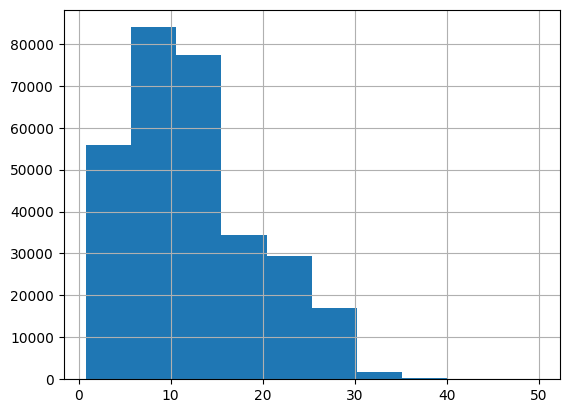

In [14]:
df['duration'].hist()

<Axes: >

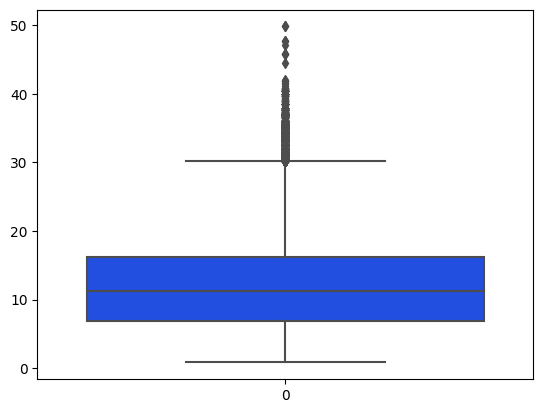

In [15]:
# see the outlier
sns.boxplot(data=df['duration'],color='red',palette='bright')

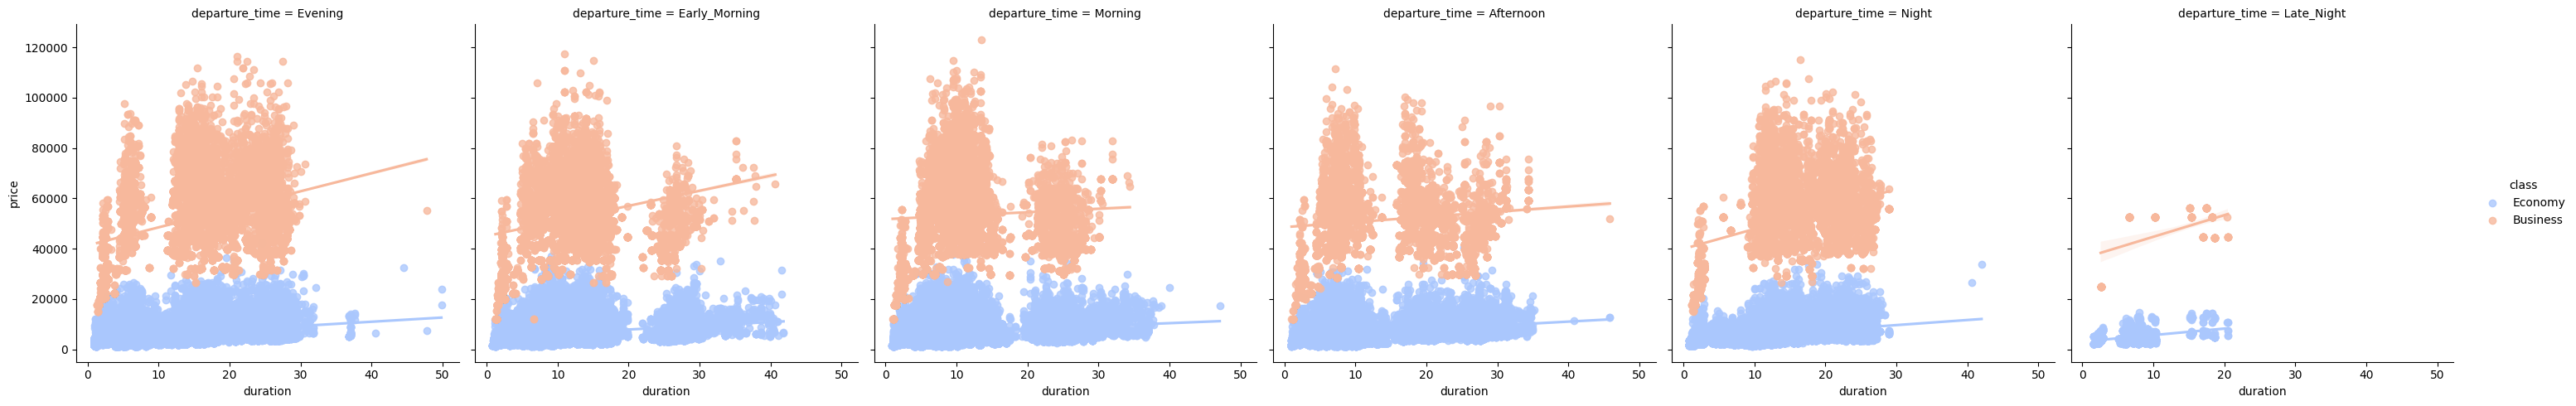

In [16]:
sns.lmplot(x='duration',y='price',data=df,col='departure_time',hue='class',palette='coolwarm')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


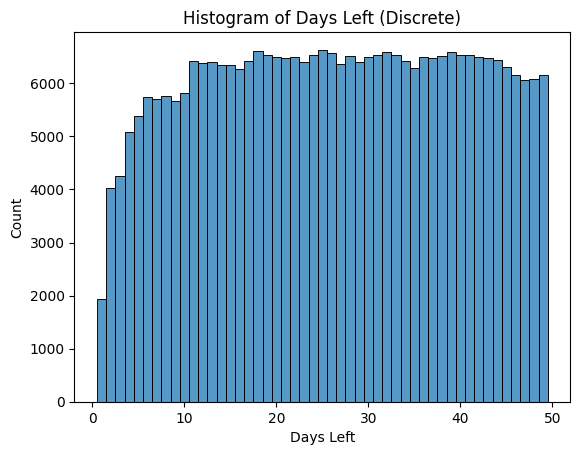

In [17]:
# Histogram with bins for each integer
sns.histplot(df['days_left'], bins=range(df['days_left'].min(), df['days_left'].max() + 1), discrete=True)

plt.xlabel("Days Left")
plt.ylabel("Count")
plt.title("Histogram of Days Left (Discrete)")
plt.show()

<Axes: >

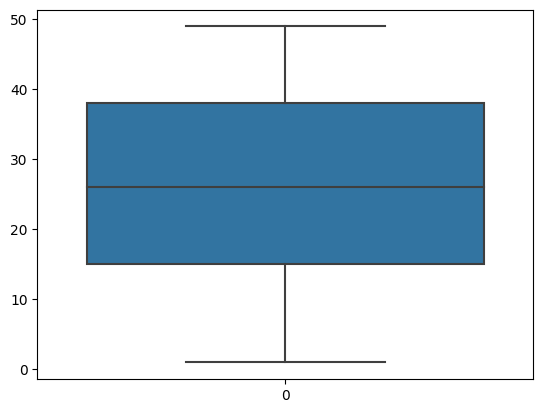

In [18]:
# see the outlier
sns.boxplot(data=df['days_left'])

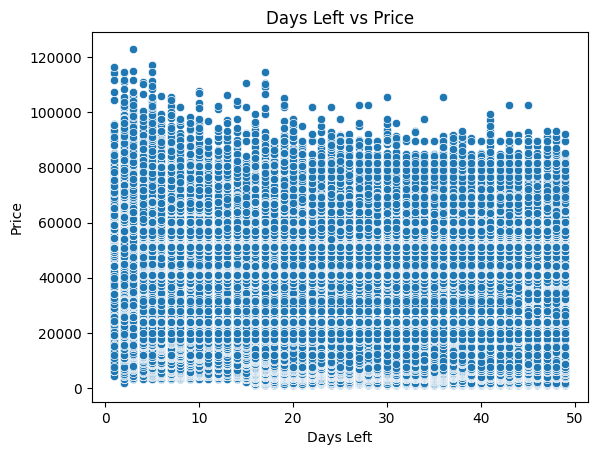

In [19]:
sns.scatterplot(x=df['days_left'], y=df['price'])
plt.xlabel("Days Left")
plt.ylabel("Price")
plt.title("Days Left vs Price")
plt.show()


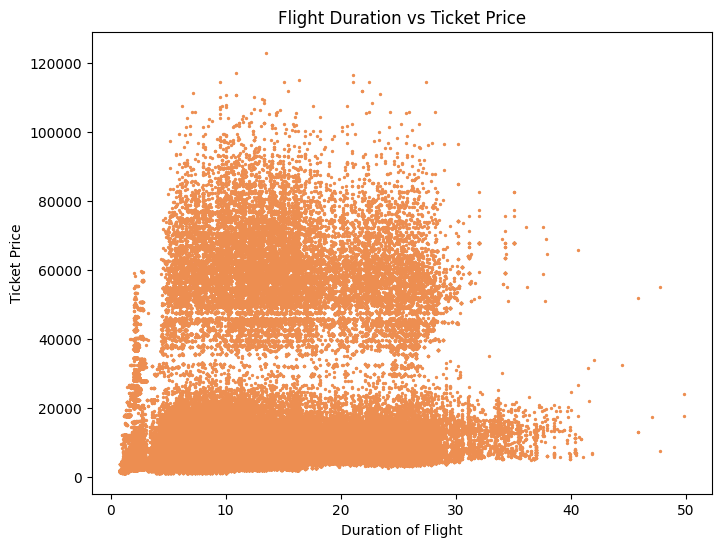

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df['duration'], df['price'], s=2, color= '#ed8e51')

plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Duration of Flight")
plt.ylabel("Ticket Price")
plt.show()


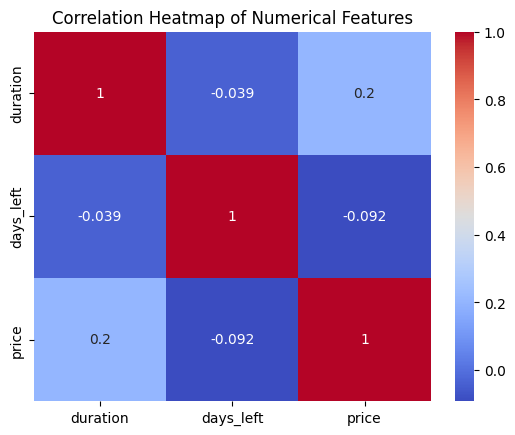

In [21]:
# Selecting only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Creating the heatmap
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [22]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1 
    
    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5
    
    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    
    return ls

In [23]:
index_list = []
index_list.extend(outliers(df,'duration'))

In [24]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [25]:
df = remove(df,index_list)

In [26]:
df.shape

(298043, 11)

In [27]:
print("Unique Airlines:", df['airline'].unique())
print("Number of Unique Flights:", df['flight'].nunique())
print("Number of Unique Source Cities:", df['source_city'].nunique())
print("Unique Departure Times:", df['departure_time'].unique())
print("Unique Arrival Times:", df['arrival_time'].unique())
print("Unique Classes:", df['class'].unique())
print("Unique Stops:", df['stops'].unique())


Unique Airlines: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Number of Unique Flights: 1561
Number of Unique Source Cities: 6
Unique Departure Times: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique Arrival Times: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Unique Classes: ['Economy' 'Business']
Unique Stops: ['zero' 'one' 'two_or_more']


In [28]:
stops_count=df['stops'].value_counts().reset_index()
class_count=df['class'].value_counts().reset_index()
departure_time_count=df['departure_time'].value_counts().reset_index()
arrival_time_count=df['arrival_time'].value_counts().reset_index()
source_city_count=df['source_city'].value_counts().reset_index()
airline_count=df['airline'].value_counts().reset_index()



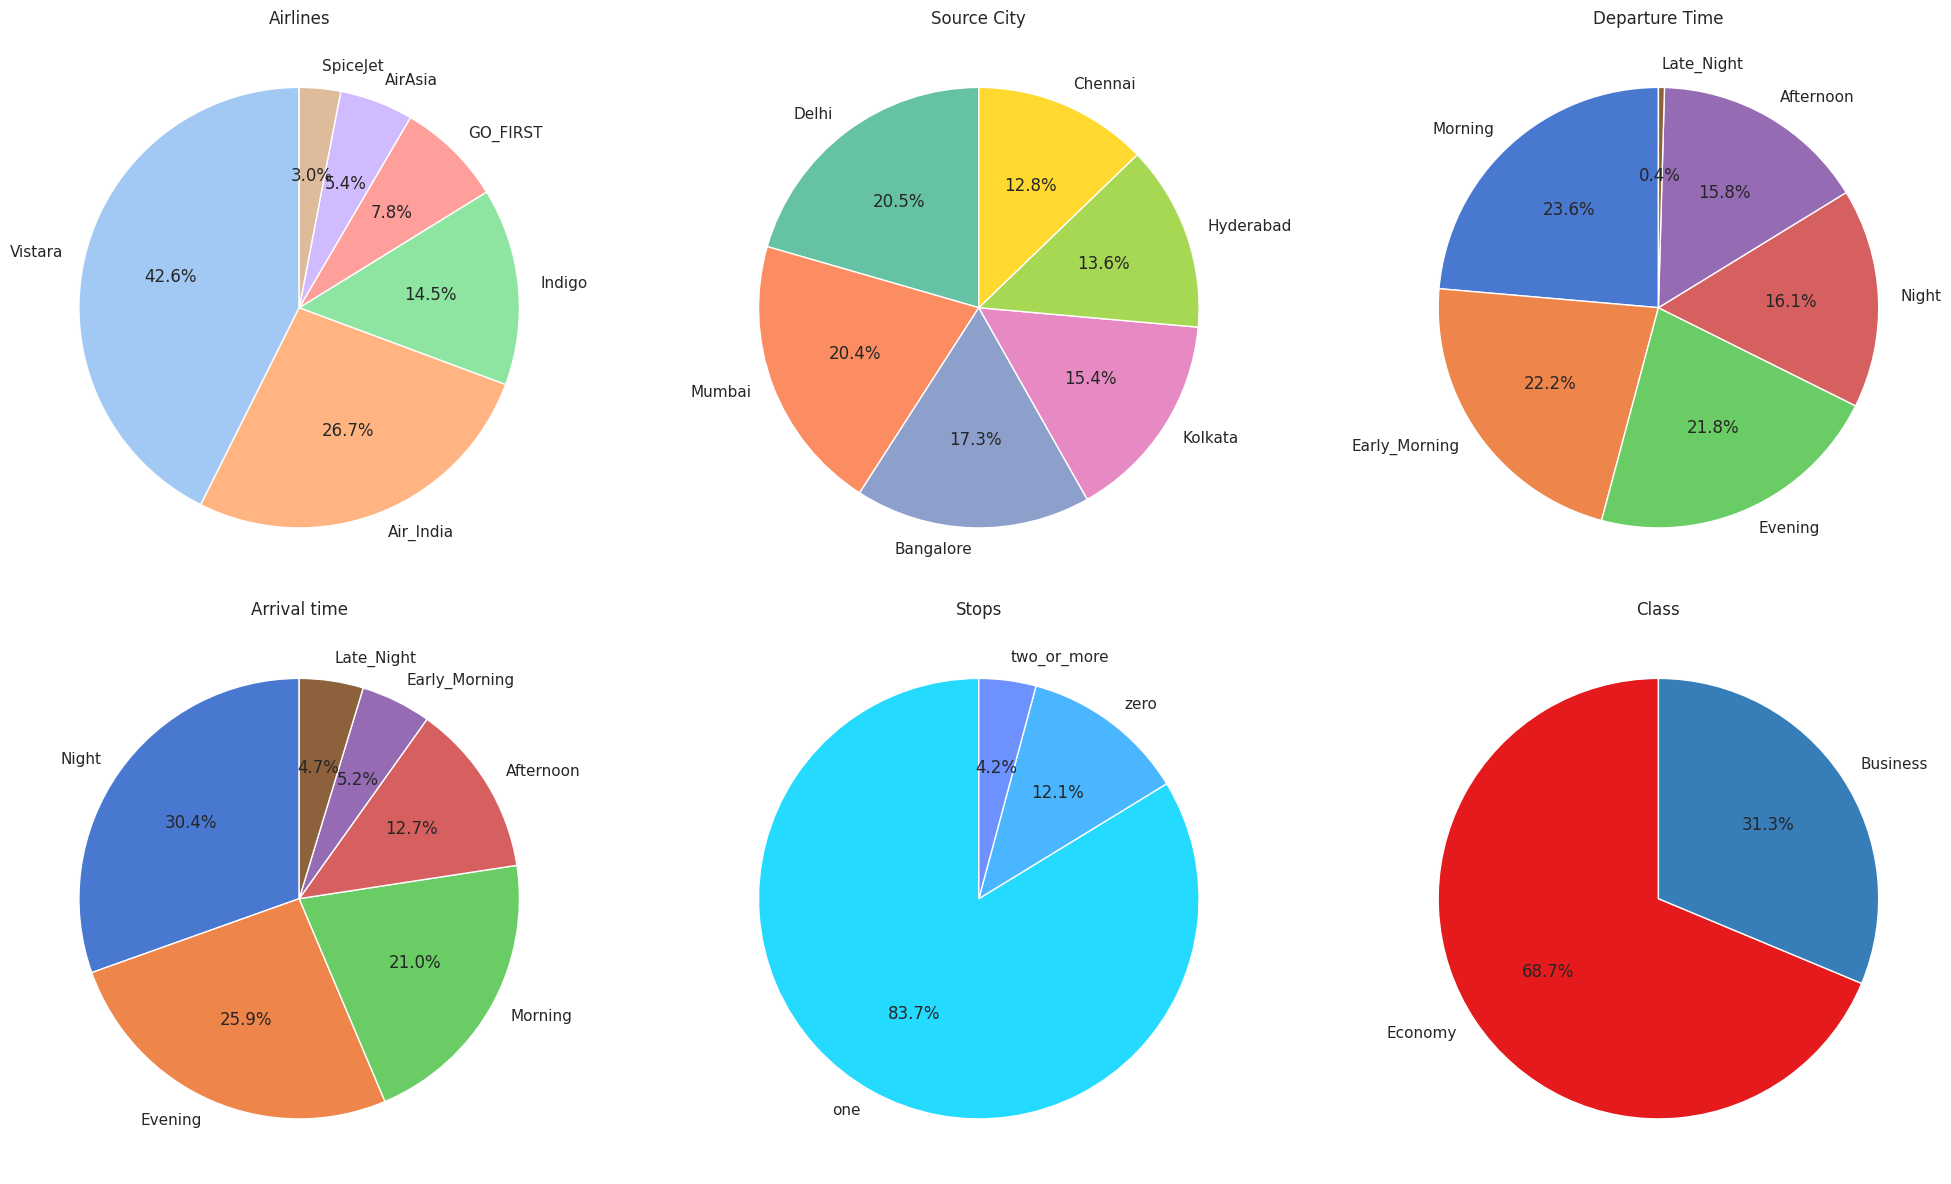

In [29]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(20,12))  # 5 columns now
axes = axes.flatten()  # flatten to 1D array for easy indexing

# 1. Airline
axes[0].pie(airline_count['count'],
            labels=airline_count['airline'],
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette("pastel"))
axes[0].set_title("Airlines")

# 2. Source City
axes[1].pie(source_city_count['count'],
            labels=source_city_count['source_city'],
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette("Set2"))
axes[1].set_title("Source City")

# 3. Departure Time
axes[2].pie(departure_time_count['count'],
            labels=departure_time_count['departure_time'],
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette("muted"))
axes[2].set_title("Departure Time")


# 3. Departure Time
axes[3].pie(arrival_time_count['count'],
            labels=arrival_time_count['arrival_time'],
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette("muted"))
axes[3].set_title("Arrival time")


# 4. Stops
axes[4].pie(stops_count['count'],
            labels=stops_count['stops'],
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette("cool"))
axes[4].set_title("Stops")

# 5. Class
axes[5].pie(class_count['count'],
            labels=class_count['class'],
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette("Set1"))
axes[5].set_title("Class")

plt.tight_layout()
plt.show()

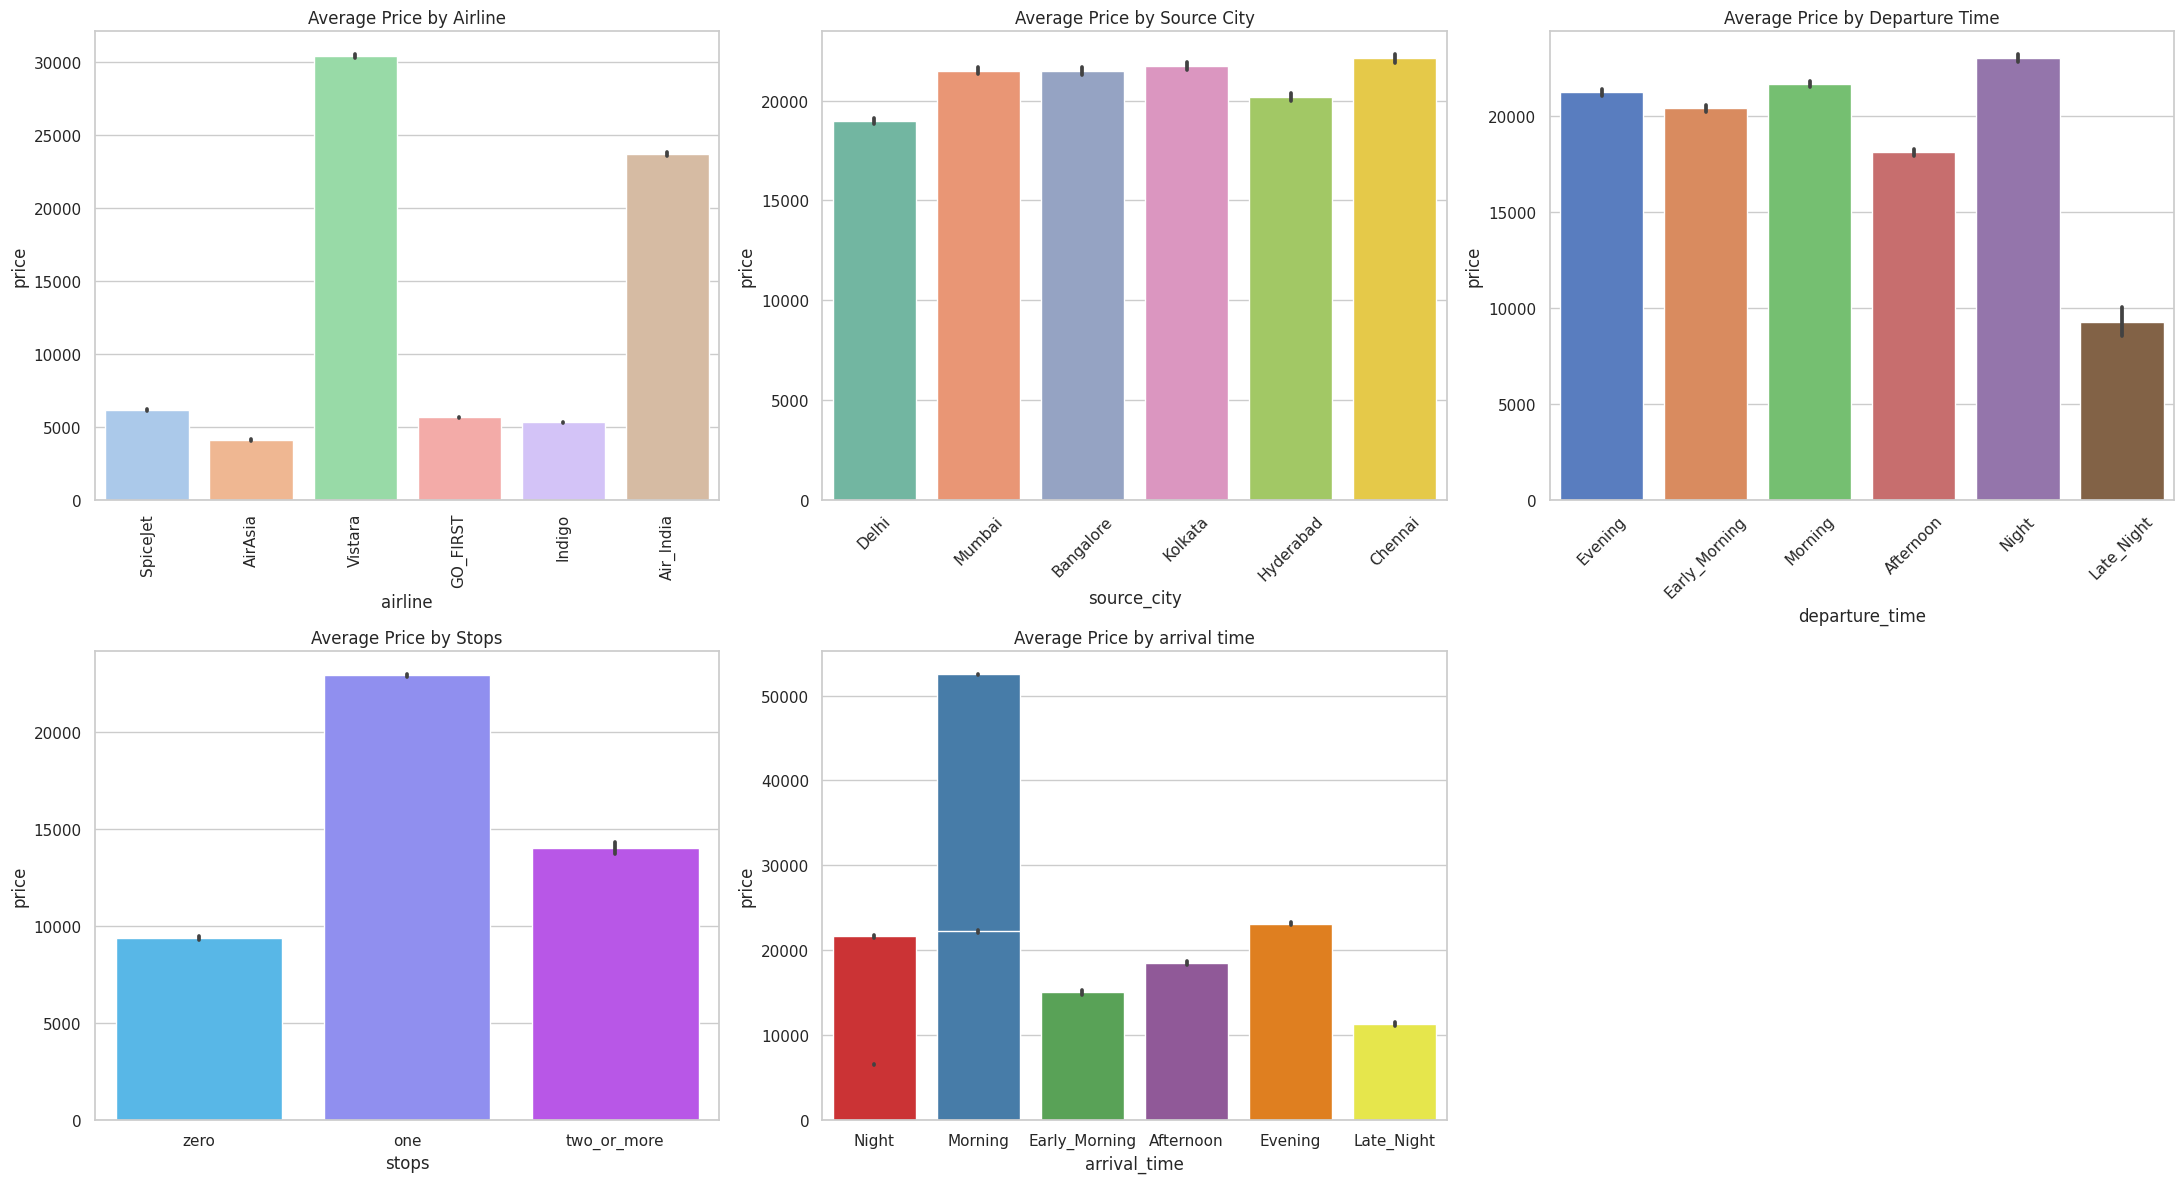

In [30]:

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(22,12))  # 2 rows, 3 cols (last will be empty)

# 1. Airline vs Price
sns.barplot(ax=axes[0,0], x="airline", y="price", data=df, palette="pastel", estimator=np.mean)
axes[0,0].set_title("Average Price by Airline")
axes[0,0].tick_params(axis='x', rotation=90)

# 2. Source City vs Price
sns.barplot(ax=axes[0,1], x="source_city", y="price", data=df, palette="Set2", estimator=np.mean)
axes[0,1].set_title("Average Price by Source City")
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Departure Time vs Price
sns.barplot(ax=axes[0,2], x="departure_time", y="price", data=df, palette="muted", estimator=np.mean)
axes[0,2].set_title("Average Price by Departure Time")
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Stops vs Price
sns.barplot(ax=axes[1,0], x="stops", y="price", data=df, palette="cool", estimator=np.mean)
axes[1,0].set_title("Average Price by Stops")

# 5. Class vs Price
sns.barplot(ax=axes[1,1], x="class", y="price", data=df, palette="Set1", estimator=np.mean)
axes[1,1].set_title("Average Price by Class")

# 5. Class vs Price
sns.barplot(ax=axes[1,1], x="arrival_time", y="price", data=df, palette="Set1", estimator=np.mean)
axes[1,1].set_title("Average Price by arrival time")

# Hide empty subplot (axes[1,2])
axes[1,2].axis("off")

plt.tight_layout()
plt.show()

In [31]:
# Encode  the data 
column=['airline','source_city','departure_time','stops','arrival_time','destination_city','class','flight']

df[column] = df[column].apply(LabelEncoder().fit_transform)


In [32]:
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
72277,5,1545,5,1,0,0,3,1,6.58,16,4230
42746,3,120,2,1,0,2,1,1,10.83,48,2050
201715,3,404,1,0,0,5,4,1,6.17,41,2359
121932,3,146,4,2,2,2,2,1,2.50,17,5229
154012,3,669,3,4,0,5,2,1,11.00,15,9073


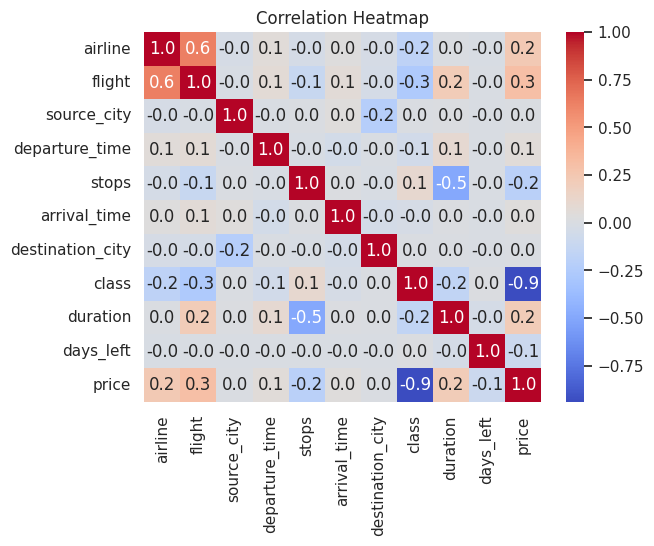

In [33]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 🏗 Model Training, Hyperparameter Tuning, and Evaluation

This section covers the complete pipeline for building regression models to predict flight prices.

### 1. Define Features
- **Categorical Columns:** ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'flight']  
- **Numerical Columns:** ['duration', 'days_left']  

We will use a `ColumnTransformer` to:
- Apply **OneHotEncoder** to categorical features  
- Apply **StandardScaler** to numerical features

---

### 2. Train-Test Split
- Target variable: `price`  
- Features: all other columns  
- Split dataset into **80% training** and **20% testing** to evaluate model performance

---

### 3. Define Models
We train multiple regression models including:

- **Linear Models:** Linear Regression, Ridge, ElasticNet  
- **Tree-Based Models:** Decision Tree, Random Forest, Extra Trees, Gradient Boosting  
- **Ensemble Models:** AdaBoost, CatBoost  
- **Instance-Based:** K-Nearest Neighbors  

Each model is wrapped in a **Pipeline** with preprocessing.

---

### 4. Hyperparameter Tuning
- Use **RandomizedSearchCV** for models that benefit from hyperparameter optimization  
- Sample from defined **distributions** (`uniform`, `randint`) for parameters like `alpha`, `n_estimators`, `max_depth`, `learning_rate`  
- Use 3-fold cross-validation and 5 random iterations for speed

---

### 5. Model Training & Evaluation
For each model:

1. Train the model (or perform randomized search if hyperparameters are defined)  
2. Save the best estimator in `tuned_models`  
3. Predict on the test set  
4. Evaluate using metrics:
   - **MAE** → Mean Absolute Error  
   - **RMSE** → Root Mean Squared Error  
   - **R²** → Coefficient of Determination  

Results are stored in a dictionary and summarized in a **DataFrame sorted by RMSE** for comparison.

---

### 6. Summary
- `results_df` shows all models’ performance metrics  
- Enables quick comparison of different regression approaches to identify the best-performing model


In [ ]:
# ================================
# Define categorical & numerical columns
# ================================
categorical_cols = ['airline', 'source_city', 'departure_time',
                    'stops', 'arrival_time', 'destination_city', 'class', 'flight']
numeric_cols = ['duration', 'days_left']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ])

# ================================
# Train-test split
# ================================
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================
# Models
# ================================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "ElasticNet (Lasso)": ElasticNet(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_jobs=-1, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_jobs=-1),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42, allow_writing_files=False)
}

# ================================
# Hyperparameter distributions for RandomizedSearchCV
# ================================
param_distributions = {
    "Ridge Regression": {"regressor__alpha": uniform(0.01, 1.0)},
    "ElasticNet (Lasso)": {
        "regressor__alpha": uniform(0.01, 1.0),
        "regressor__l1_ratio": uniform(0, 1)
    },
    "Decision Tree": {
        "regressor__max_depth": randint(5, 20),
        "regressor__min_samples_split": randint(2, 10)
    },
    "Random Forest": {
        "regressor__n_estimators": randint(30, 100),
        "regressor__max_depth": randint(5, 20)
    },
    "Extra Trees": {
        "regressor__n_estimators": randint(30, 100),
        "regressor__max_depth": randint(5, 20)
    },
    "Gradient Boosting": {
        "regressor__n_estimators": randint(50, 150),
        "regressor__max_depth": randint(3, 8),
        "regressor__learning_rate": uniform(0.01, 0.3)
    
    },

    "AdaBoost": {
        "regressor__n_estimators": randint(50, 150),
        "regressor__learning_rate": uniform(0.01, 0.5)
    },
    "CatBoost": {
        "regressor__depth": randint(4, 10),
        "regressor__learning_rate": uniform(0.01, 0.3),
        "regressor__n_estimators": randint(100, 300)
    }
}

# ================================
# Training + RandomizedSearch + Evaluation
# ================================
results = {}
tuned_models = {}

for name, regressor in models.items():
    print(f"🔍 Training {name} ...")
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    
    if name in param_distributions:
        random_search = RandomizedSearchCV(
            model,
            param_distributions=param_distributions[name],
            n_iter=5,  # keep small for speed
            cv=3,
            n_jobs=-1,
            scoring="neg_root_mean_squared_error",
            random_state=42
        )
        random_search.fit(X_train, y_train)
        tuned_model = random_search.best_estimator_
        print(f"✅ Best params for {name}: {random_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        tuned_model = model
    
    # Save
    tuned_models[name] = tuned_model
    
    # Evaluate
    y_pred = tuned_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
    print(f"📊 {name} → MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}\n")

# ================================
# Summary DataFrame
# ================================
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print("✅ Final Summary:")
print(results_df)

🔍 Training Linear Regression ...
📊 Linear Regression → MAE=4256.75, RMSE=6192.77, R²=0.926

🔍 Training Ridge Regression ...
✅ Best params for Ridge Regression: {'regressor__alpha': 0.16601864044243653}
📊 Ridge Regression → MAE=4258.53, RMSE=6194.89, R²=0.925

🔍 Training ElasticNet (Lasso) ...
✅ Best params for ElasticNet (Lasso): {'regressor__alpha': 0.06808361216819946, 'regressor__l1_ratio': 0.8661761457749352}
📊 ElasticNet (Lasso) → MAE=4434.43, RMSE=6584.89, R²=0.916

🔍 Training Decision Tree ...
✅ Best params for Decision Tree: {'regressor__max_depth': 17, 'regressor__min_samples_split': 8}
📊 Decision Tree → MAE=1669.85, RMSE=3413.58, R²=0.977

🔍 Training Random Forest ...
✅ Best params for Random Forest: {'regressor__max_depth': 17, 'regressor__n_estimators': 44}
📊 Random Forest → MAE=1575.79, RMSE=3055.47, R²=0.982

🔍 Training Extra Trees ...
✅ Best params for Extra Trees: {'regressor__max_depth': 17, 'regressor__n_estimators': 44}
📊 Extra Trees → MAE=1666.68, RMSE=3249.58, R²=0

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ================================
# Preprocessing
# ================================
categorical_cols = ['airline', 'source_city', 'departure_time',
                    'stops', 'arrival_time', 'destination_city', 'class', 'flight']
numeric_cols = ['duration', 'days_left']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ])

# ================================
# Train-test split
# ================================
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================
# Random Forest Pipeline
# ================================
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=44, random_state=42, n_jobs=-1 ,max_depth =17))
])

# Train
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred = rf_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"📊 Random Forest → MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}")


📊 Random Forest → MAE=1575.79, RMSE=3055.47, R²=0.982


In [39]:
# ================================
# Access the trained Random Forest model and make predictions on random samples
# ================================

import random

# Pick 10 random indices from the test set
random_indices = random.sample(range(X_test.shape[0]), 10)

sample_X = X_test.iloc[random_indices]
sample_y = y_test.iloc[random_indices]

# Predict
predictions = rf_pipeline.predict(sample_X)

# Display results
for i, (true, pred) in enumerate(zip(sample_y, predictions), start=1):
    print(f"Example {i:02d} | True Price: {true:.2f} | Predicted Price: {pred:.2f}")


Example 01 | True Price: 3862.00 | Predicted Price: 3894.09
Example 02 | True Price: 13524.00 | Predicted Price: 13377.65
Example 03 | True Price: 5280.00 | Predicted Price: 5745.66
Example 04 | True Price: 51875.00 | Predicted Price: 52347.87
Example 05 | True Price: 42212.00 | Predicted Price: 42335.23
Example 06 | True Price: 6014.00 | Predicted Price: 6572.22
Example 07 | True Price: 64285.00 | Predicted Price: 64879.69
Example 08 | True Price: 9933.00 | Predicted Price: 11719.46
Example 09 | True Price: 6893.00 | Predicted Price: 5275.60
Example 10 | True Price: 5660.00 | Predicted Price: 6860.28
